**Student Name**: Puneet

**Student Roll No**: 21f3002005

# Programming Assignment-1


There are two problems worth 100 marks. There is a problem at the end that you can attempt for bonus marks. Make a copy of the colab. Rename the colab as follows:

```
PA-1_<roll-number>.ipynb
```

We will be running your colab. It should produce the graphs/charts of the learning curves as explaind in the problem statements. Add comments wherever necessary. At the end of each problem, enter your observations in the text cell. This should include your analysis of the learning curves obtaind.

### Libraries

Stick to `NumPy` and a library such as `matplotlib`, `seaborn` or `plotly` for rendering plots.

In [2]:
# import necessary libraries here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1 [65 Marks]

You will be simulating the 10-armed bandit testbed.


### Single Bandit problem

The bandit problem should have $10$ arms. For each arm, the $q_{*}(a)$ value should be sampled from a Gaussian distribution with $0$ mean and unit variance . The rewards from arm $a$ should be sampled from a Gaussian distribution with mean $q_{}(a)$  and unit variance .


### Testbed

Generate 2000 different bandit problems. Use the sample average method with incremental implementation for learning the action values. Plot the learning curves for 1000 timesteps with the following algorithms:

- gready
- $ϵ$-greedy
  - $ϵ$-0.1
  - $ϵ$-0.01

There are two learning curves for each algorithm:
- average reward vs time
- %  optimal actions vs time

You have to reproduce the following two curves:
1. Average rewards vs # of steps
2. % optimal action vs # of steps



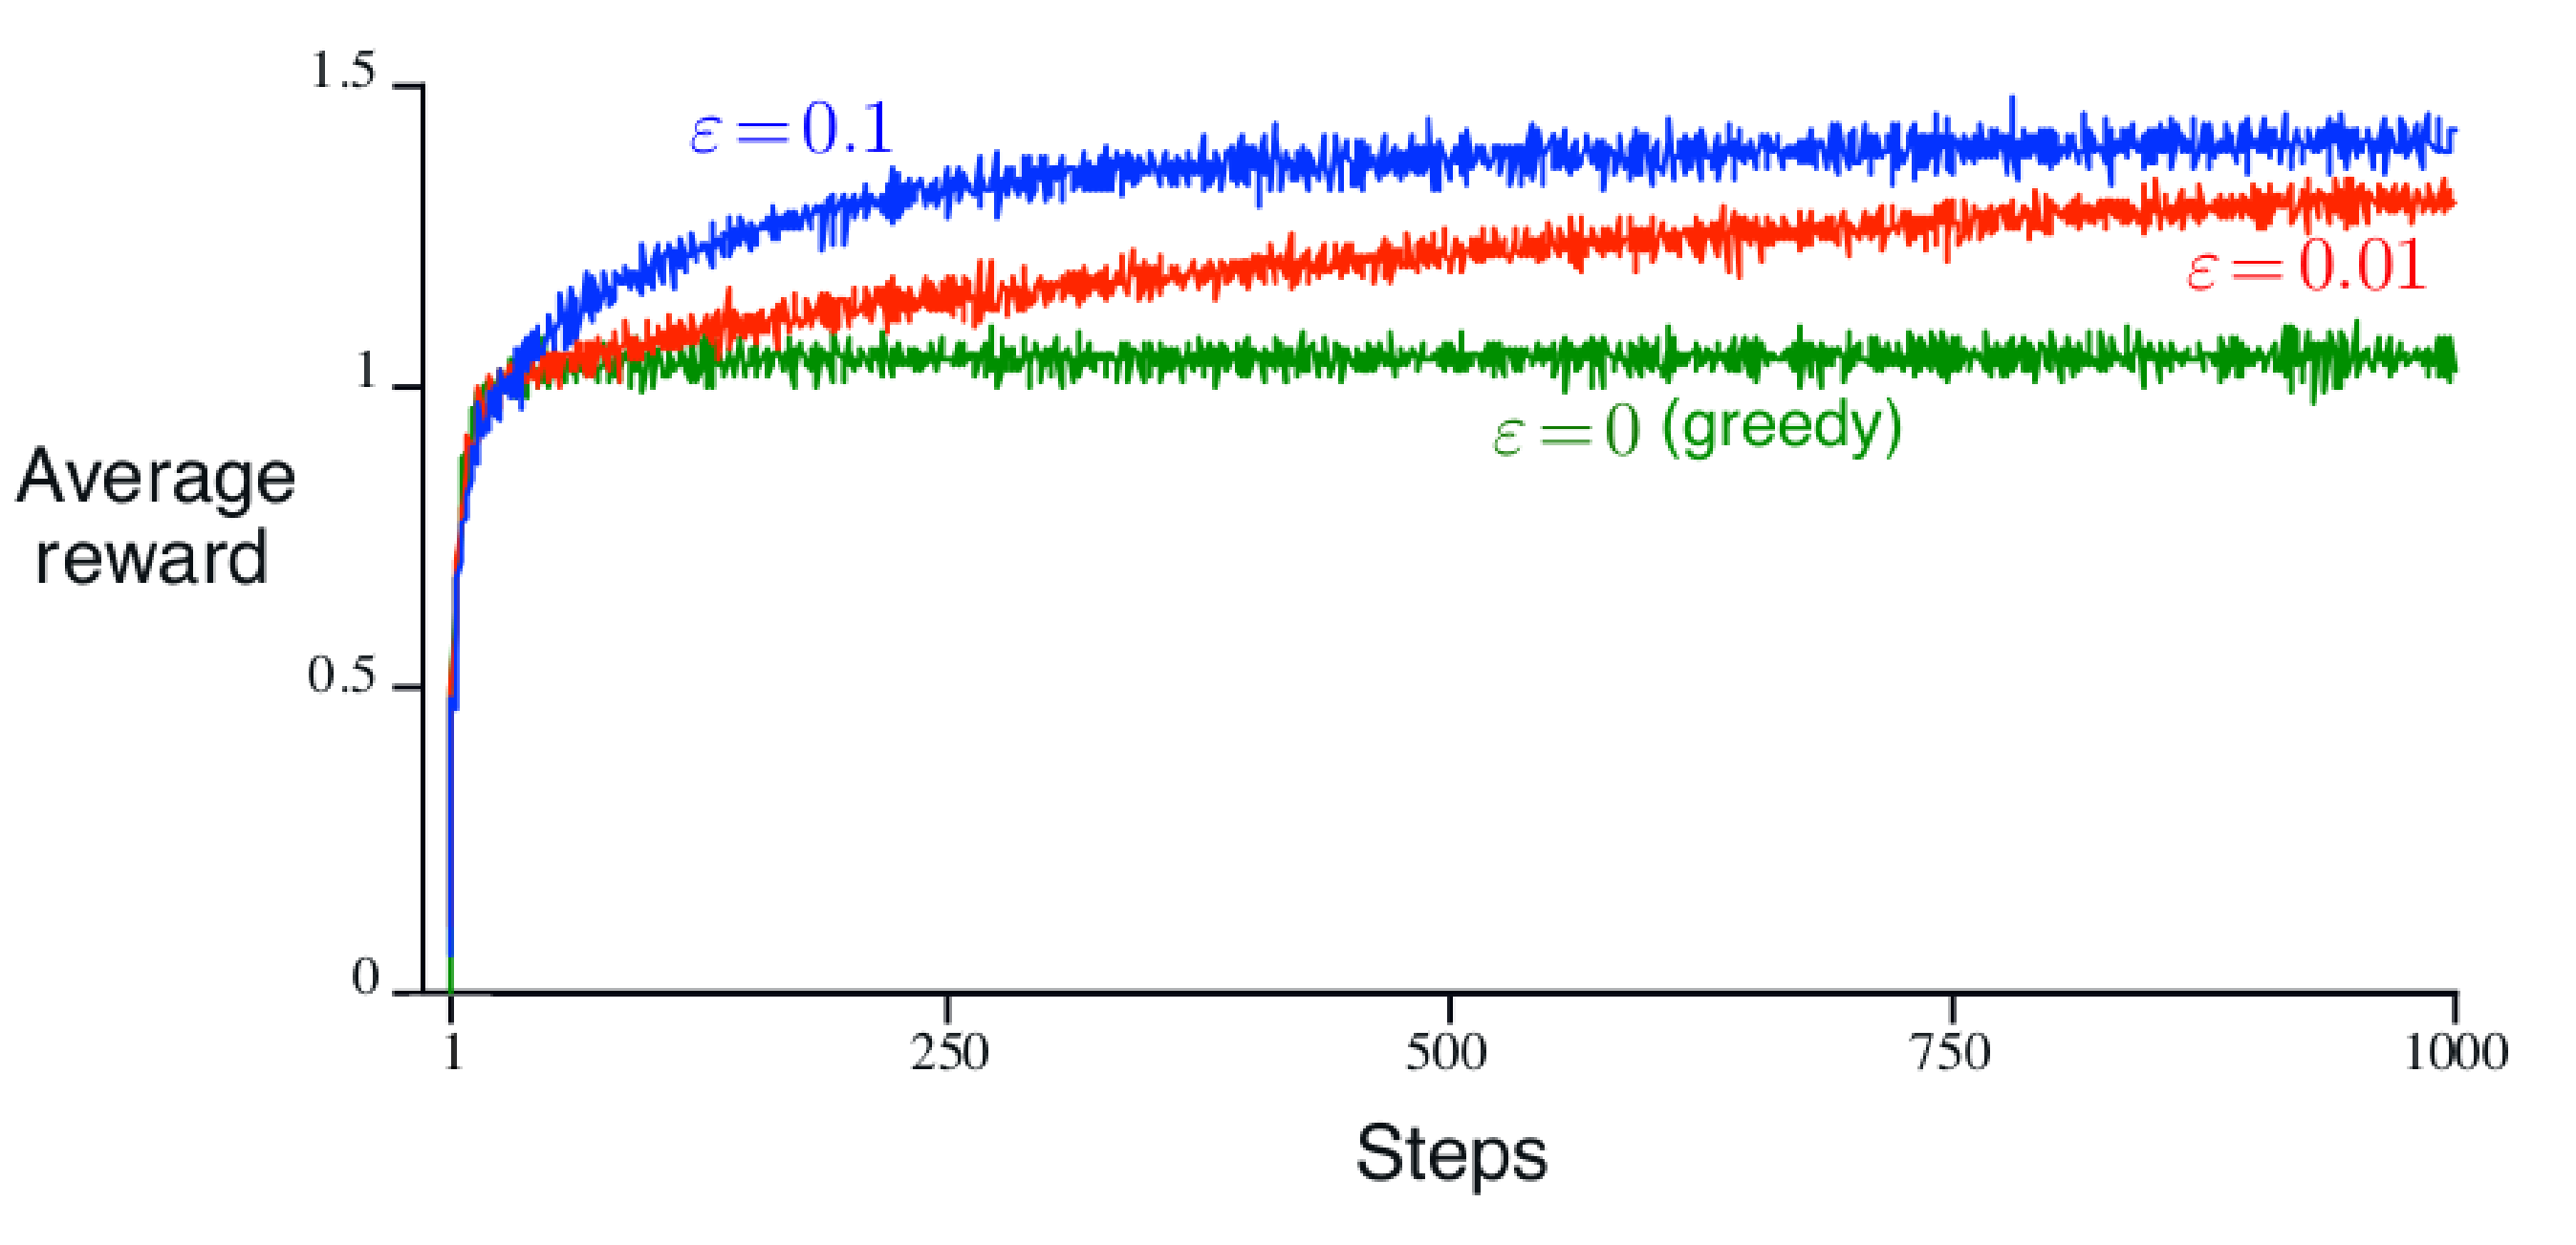

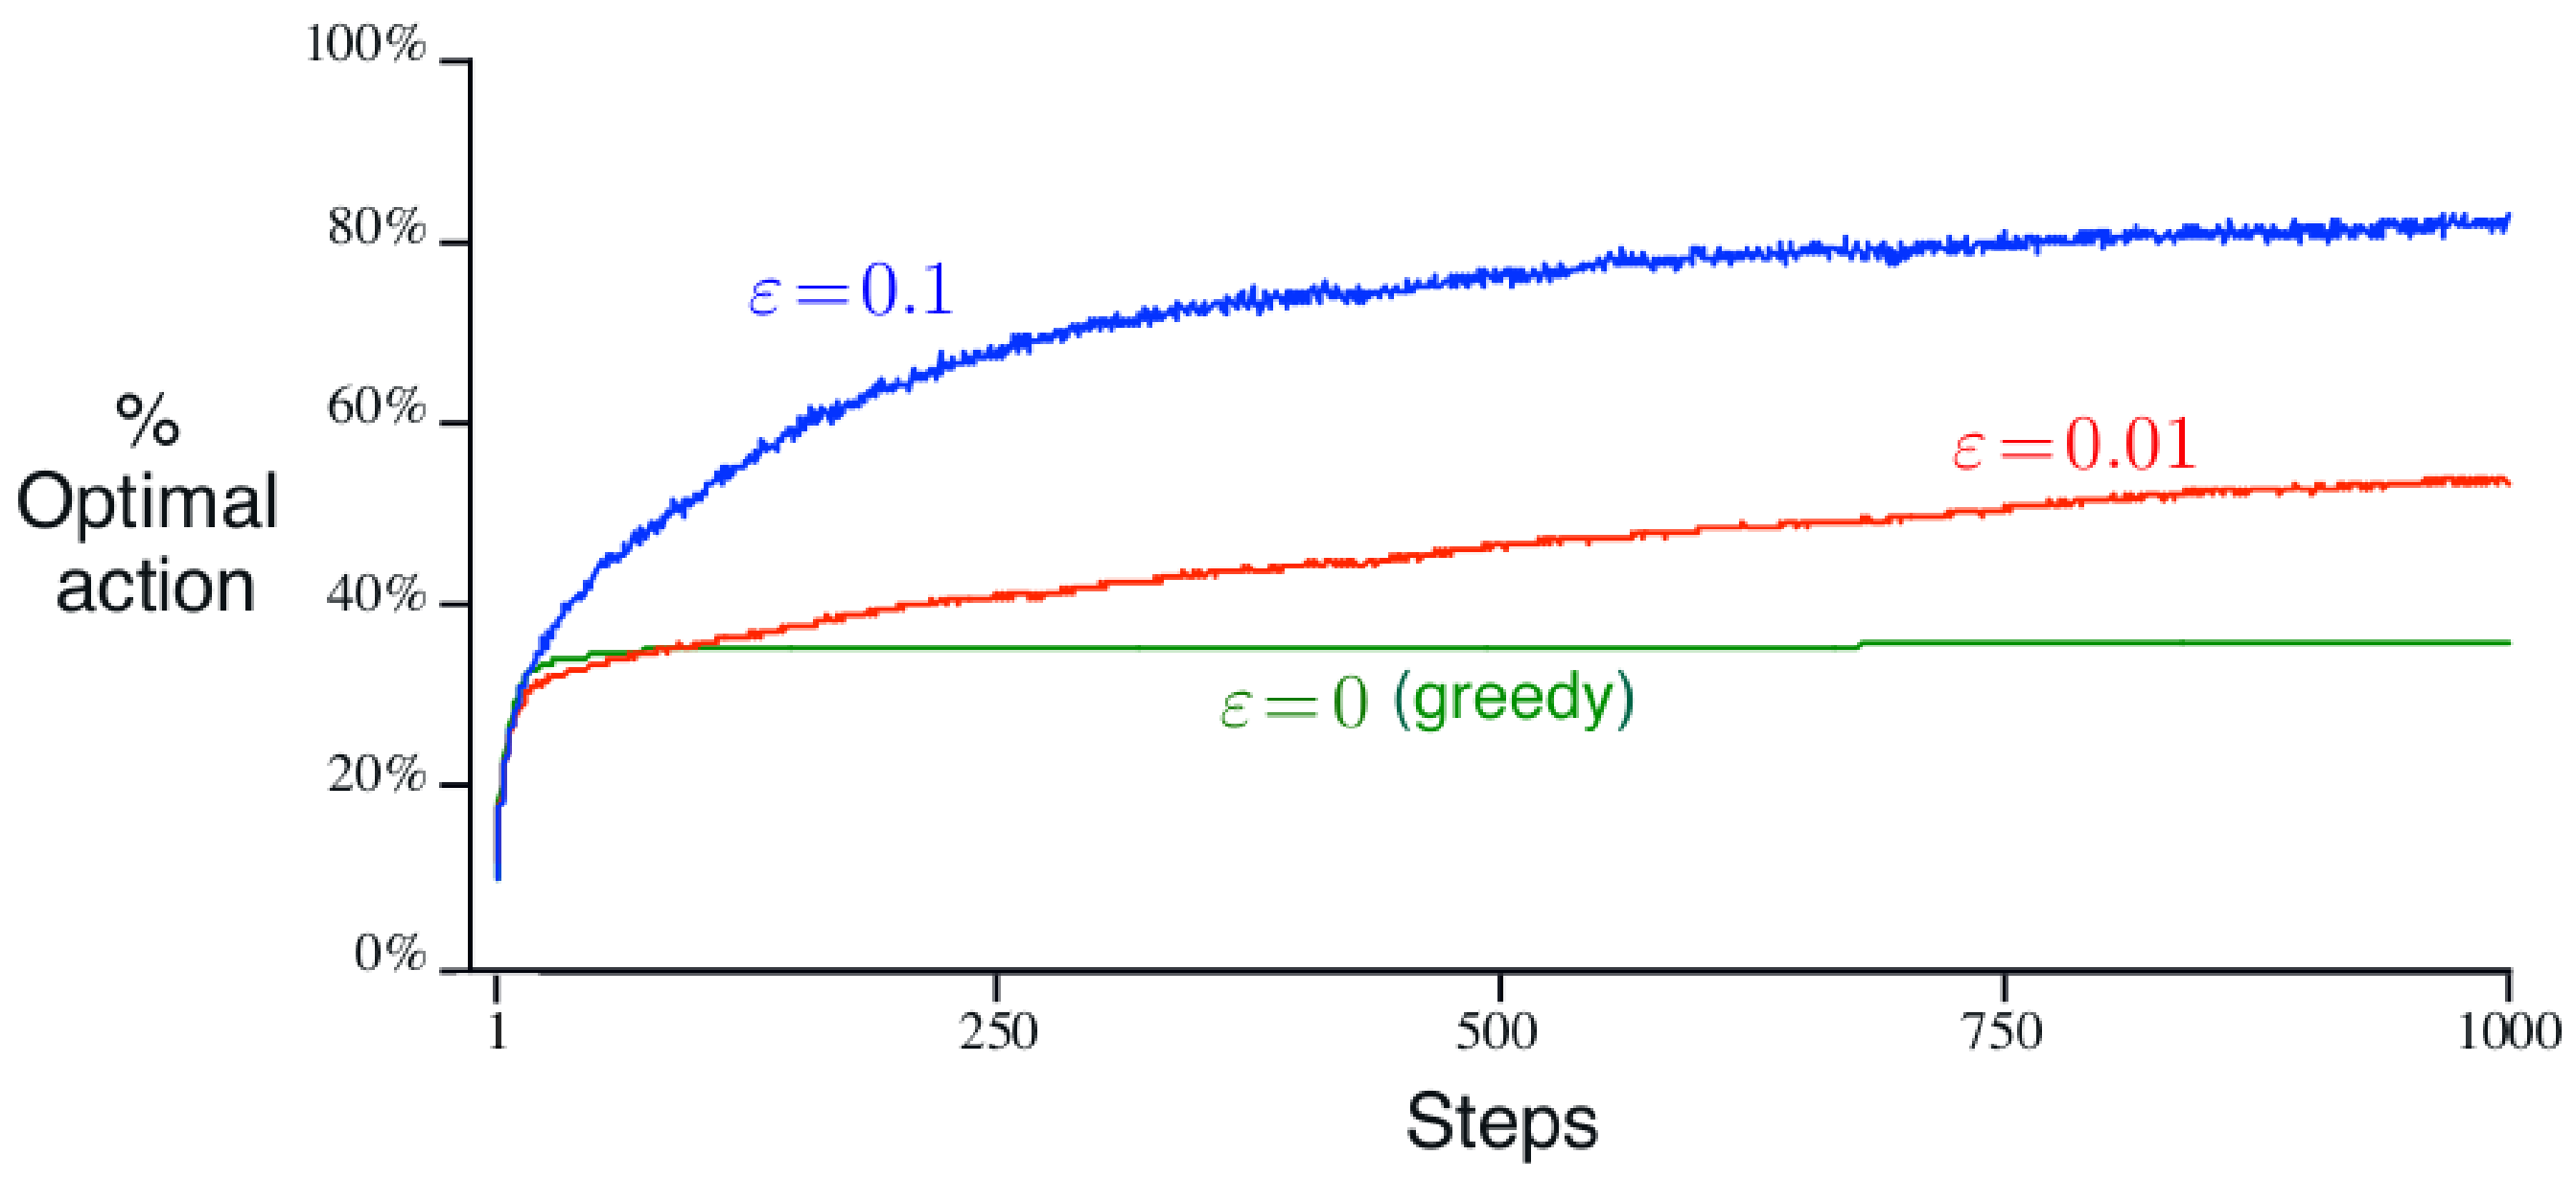

**Hint**: the averaging at each time step is done over all the 2000 bandit problems. For example, to
plot a single point $(t,r(t))$ in the "average reward plot", find the reward sampled from each of the 2000  bandits at time $t$ and compute their average. This value will be $r(t)$.

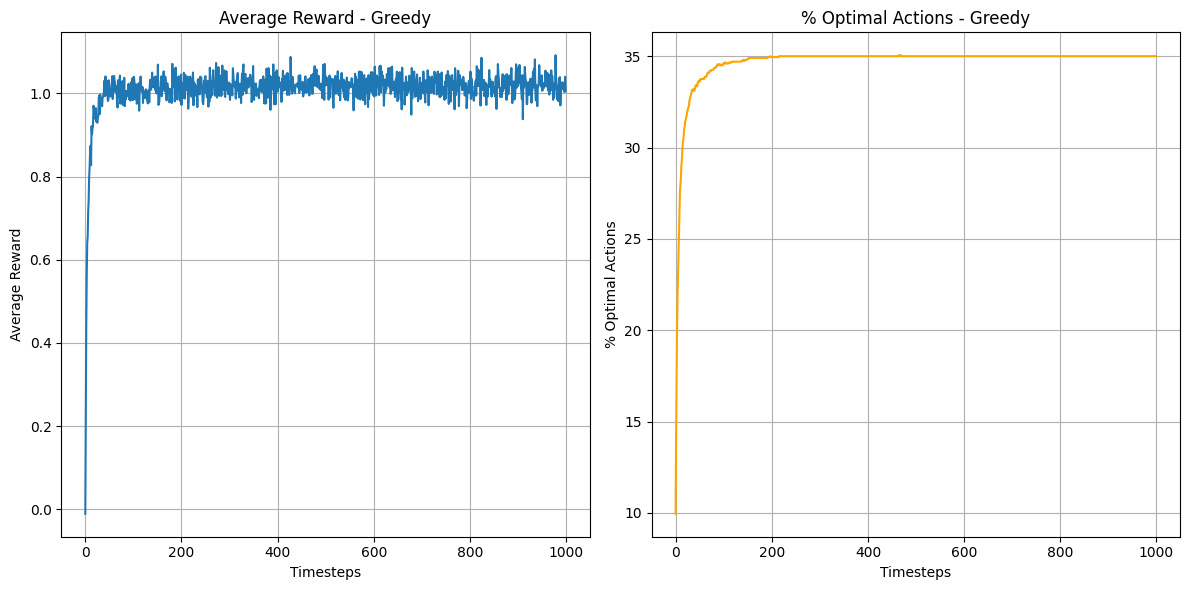

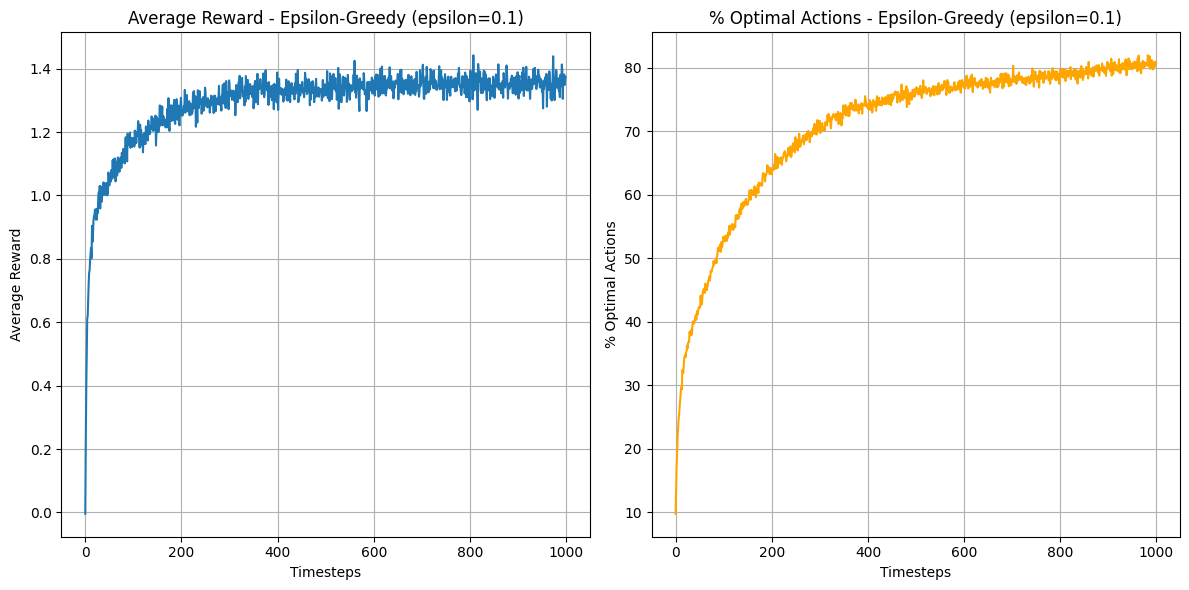

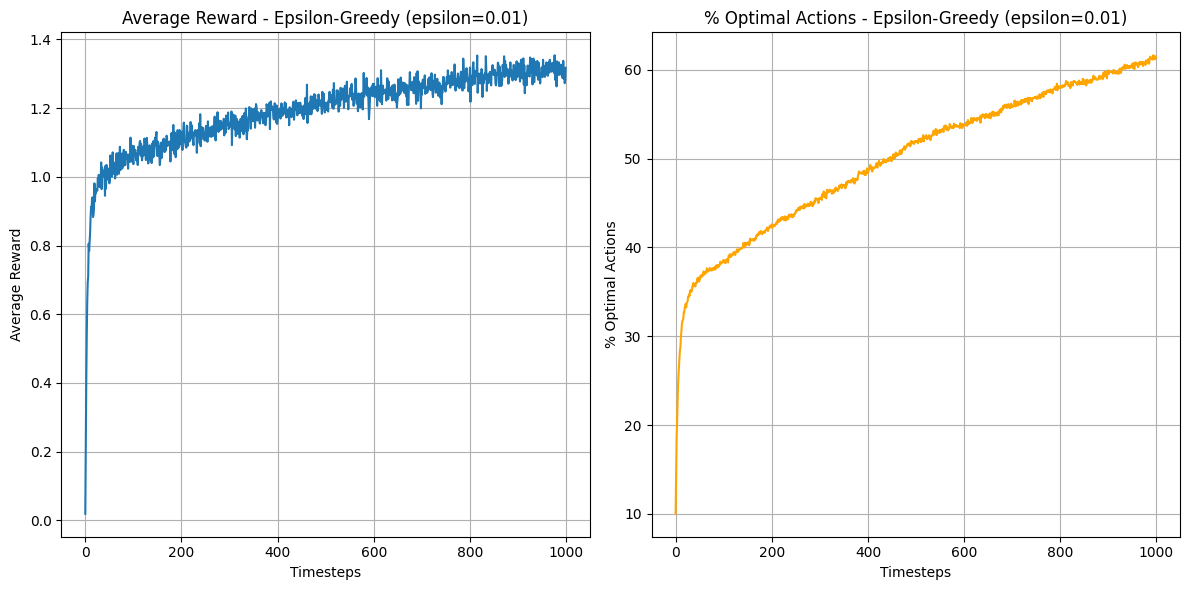

In [3]:
# This is a function to generate a single bandit problem.
def generate_bandit_problem(num_arms=10):
    return np.random.normal(0, 1, num_arms)  # q*(a) values from Gaussian(0, 1)

# This is a function to implement the sample average method with incremental implementation
def sample_average_method(bandit_problems, num_timesteps=1000, epsilon=0):
    num_bandits = len(bandit_problems)
    num_arms = len(bandit_problems[0])

    rewards = np.zeros((num_bandits, num_timesteps))
    optimal_actions = np.zeros((num_bandits, num_timesteps))

    for b in range(num_bandits):
        q_star = bandit_problems[b]
        optimal_action = np.argmax(q_star)

        q_estimates = np.zeros(num_arms)  # Initial estimates of action values, we have initialized them to 0.
        action_counts = np.zeros(num_arms)  # We count the number of times each action is taken.

        for t in range(num_timesteps):
            if np.random.rand() < epsilon:
                action = np.random.choice(num_arms)  # Exploration Technique
            else:
                action = np.argmax(q_estimates)  # Exploitation Technique

            reward = np.random.normal(q_star[action], 1)  # Reward sampled from Gaussian(q(a), 1)
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]  # Update happens incrementally.

            rewards[b, t] = reward
            if action == optimal_action:
                optimal_actions[b, t] = 1

    return rewards, optimal_actions

# Simple function to plot the learning curves separately.
def plot_learning_curves(rewards, optimal_actions, num_timesteps, algorithm_name):
    average_rewards = np.mean(rewards, axis=0)
    average_optimal_actions = np.mean(optimal_actions, axis=0) * 100

    plt.figure(figsize=(12, 6))

    # Rewards Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(num_timesteps), average_rewards)
    plt.title(f'Average Reward - {algorithm_name}')
    plt.xlabel('Timesteps')
    plt.ylabel('Average Reward')
    plt.grid()

    # % Optimal actions plot
    plt.subplot(1, 2, 2)
    plt.plot(range(num_timesteps), average_optimal_actions, color='orange')
    plt.title(f'% Optimal Actions - {algorithm_name}')
    plt.xlabel('Timesteps')
    plt.ylabel('% Optimal Actions')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Set the parameters.
num_bandits = 2000
num_timesteps = 1000
num_arms = 10

bandit_problems = [generate_bandit_problem(num_arms=num_arms) for _ in range(num_bandits)]

# Greedy algorithm (epsilon=0)
rewards_greedy, optimal_actions_greedy = sample_average_method(bandit_problems, num_timesteps, epsilon=0)
plot_learning_curves(rewards_greedy, optimal_actions_greedy, num_timesteps, 'Greedy')

# Epsilon-greedy algorithm (epsilon=0.1)
rewards_epsilon_01, optimal_actions_epsilon_01 = sample_average_method(bandit_problems, num_timesteps, epsilon=0.1)
plot_learning_curves(rewards_epsilon_01, optimal_actions_epsilon_01, num_timesteps, 'Epsilon-Greedy (epsilon=0.1)')

# Epsilon-greedy algorithm (epsilon=0.01)
rewards_epsilon_001, optimal_actions_epsilon_001 = sample_average_method(bandit_problems, num_timesteps, epsilon=0.01)
plot_learning_curves(rewards_epsilon_001, optimal_actions_epsilon_001, num_timesteps, 'Epsilon-Greedy (epsilon=0.01)')

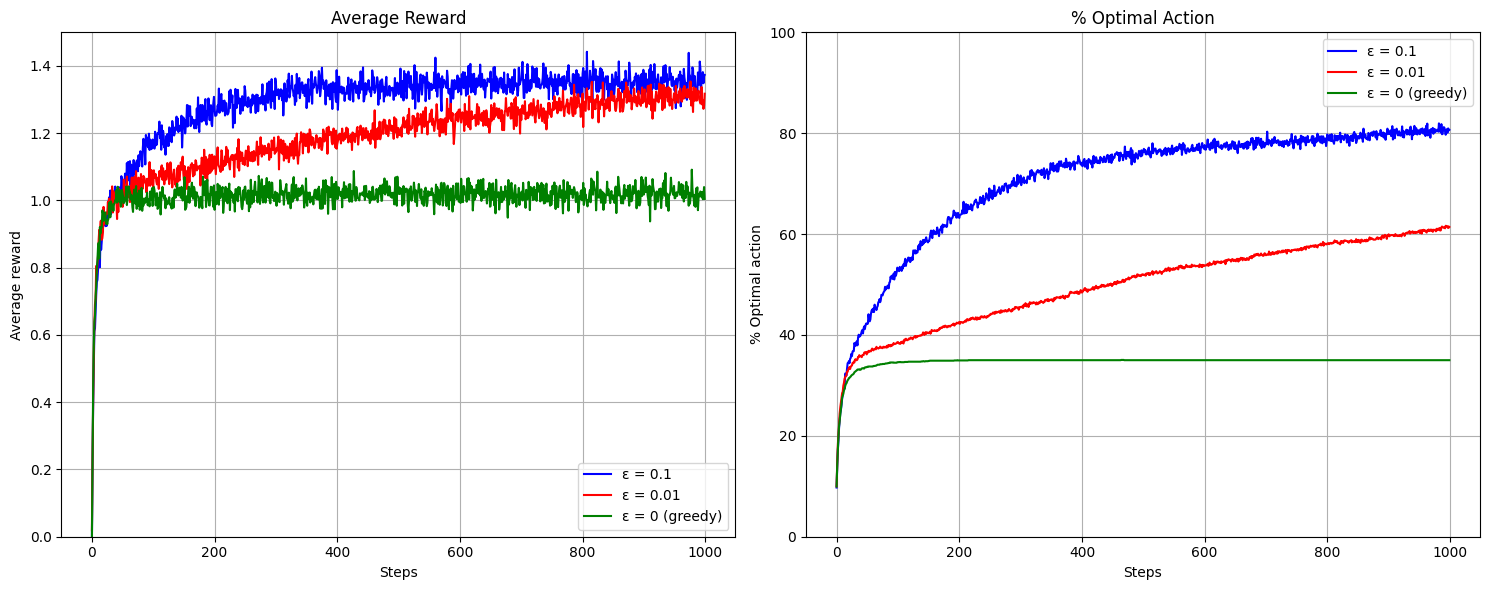

In [4]:
# Create combined plots
plt.figure(figsize=(15, 6))

# Average rewards plot
plt.subplot(1, 2, 1)
plt.plot(range(num_timesteps), np.mean(rewards_epsilon_01, axis=0), 'b-', label='ε = 0.1')
plt.plot(range(num_timesteps), np.mean(rewards_epsilon_001, axis=0), 'r-', label='ε = 0.01')
plt.plot(range(num_timesteps), np.mean(rewards_greedy, axis=0), 'g-', label='ε = 0 (greedy)')
plt.title('Average Reward')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.5)

# % Optimal actions plot
plt.subplot(1, 2, 2)
plt.plot(range(num_timesteps), np.mean(optimal_actions_epsilon_01, axis=0) * 100, 'b-', label='ε = 0.1')
plt.plot(range(num_timesteps), np.mean(optimal_actions_epsilon_001, axis=0) * 100, 'r-', label='ε = 0.01')
plt.plot(range(num_timesteps), np.mean(optimal_actions_greedy, axis=0) * 100, 'g-', label='ε = 0 (greedy)')
plt.title('% Optimal Action')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


### Observations from problem-1

1. Pure exploitation (that is the greedy approach) leads to premature convergence and performance which is suboptimal. The greedy strategy plateaus quickly at 1.0 reward, which shows limited improvement after the initial learning part. Also, it gets stuck at 35% optimal actions which the poorest long-term performance.
2. Higher exploration at e=0.1 helps to find the better optimal actions, which gives the best long-term performance. It has reward of 1.4, also, it shows the best learning paradigm, with almost 80% optimal actions.
3. e=0.01, gives moderate exploration, gives an idea of middle ground but does not match the long-term performance of e=0.1. It has an estimated reward of 1.2, and is able to achieve almost 50% of the optimal actions.

## Problem 2 [35 Marks]

Run the UCB algorithm on the ten-armed testbed. Plot the learning curve for UCB and compare it with $\epsilon$-greedy for $\epsilon = 0.1$. Reproduce the following learning curves averaged over 2000  bandits for 1000 timesteps:

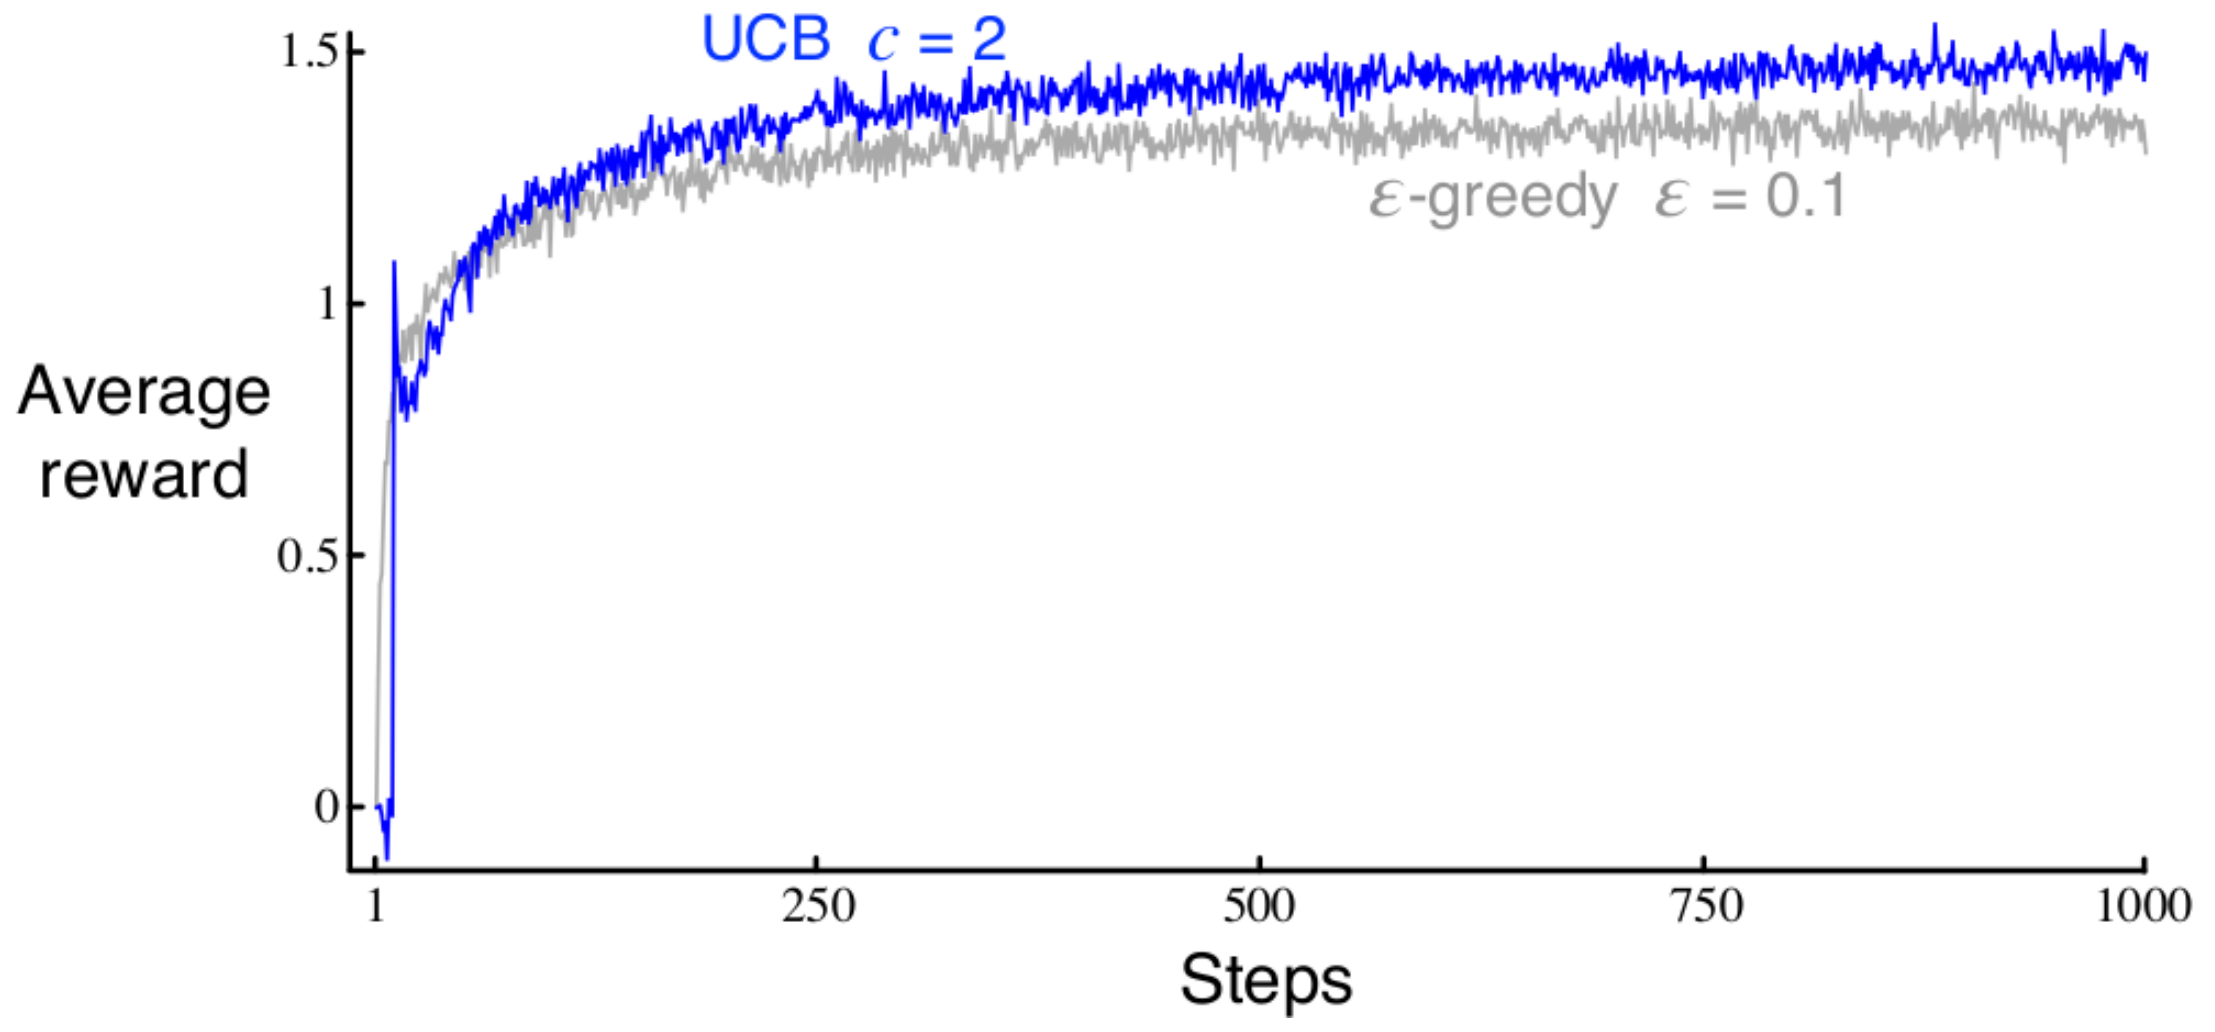

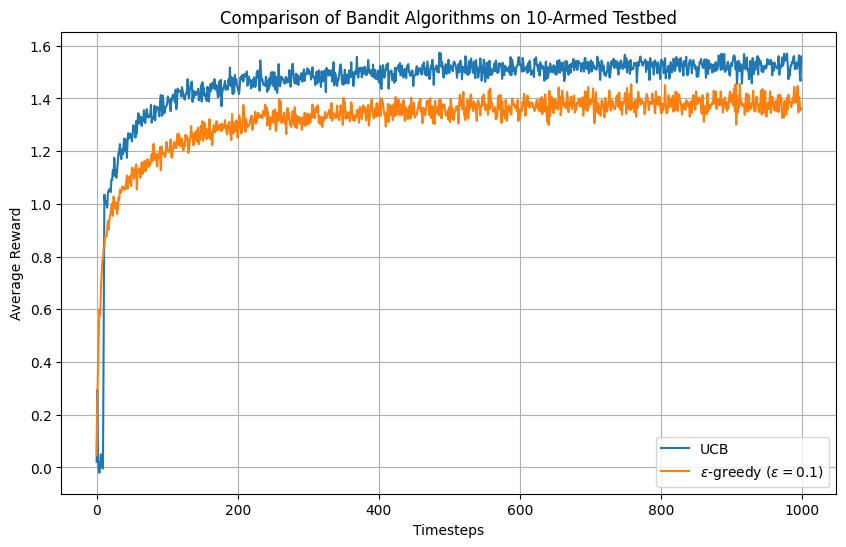

In [5]:
# write your code here for problem-2

import numpy as np
import matplotlib.pyplot as plt

class UCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        total_counts = np.sum(self.counts)
        if total_counts == 0:
            return np.random.randint(self.n_arms)
        ucb_values = self.values + np.sqrt(2 * np.log(total_counts) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] = ((n-1)/n)*self.values[arm] + (1/n)*reward

class EpsilonGreedy:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] = ((n-1)/n)*self.values[arm] + (1/n)*reward

def run_bandit_algorithm(algorithm, n_bandits, n_timesteps, true_rewards):
    sum_rewards = np.zeros(n_timesteps)
    for b in range(n_bandits):
        algo = algorithm()
        for t in range(n_timesteps):
            arm = algo.select_arm()
            reward = np.random.normal(true_rewards[b, arm], 1)
            algo.update(arm, reward)
            sum_rewards[t] += reward
    return sum_rewards / n_bandits

# Parameters
n_bandits = 2000
n_timesteps = 1000
n_arms = 10
epsilon = 0.1

# Generate true rewards once for fair comparison
np.random.seed(42)
true_rewards = np.random.normal(0, 1, (n_bandits, n_arms))

ucb_rewards = run_bandit_algorithm(lambda: UCB(n_arms), n_bandits, n_timesteps, true_rewards)
epsilon_rewards = run_bandit_algorithm(lambda: EpsilonGreedy(n_arms, epsilon), n_bandits, n_timesteps, true_rewards)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ucb_rewards, label='UCB')
plt.plot(epsilon_rewards, label=r'$\epsilon$-greedy ($\epsilon=0.1$)')
plt.xlabel('Timesteps')
plt.ylabel('Average Reward')
plt.title('Comparison of Bandit Algorithms on 10-Armed Testbed')
plt.legend()
plt.grid(True)
plt.show()

### Observations from problem-2

1. First thing is clear, that UCB algorithm runs slower. But it provides us with a significantly high long-term performance.
2. Epsilon greedy has the faster initial learning rate, but it again plateaus at the lower or sub-optimal actions.
3. We are able to see the exploration-exploitation tradeoff, which is a characteristic of the bandit problems.

## Bonus Problem [10 Marks]

Solve problems 1 and 2 for $10,000$ arms.

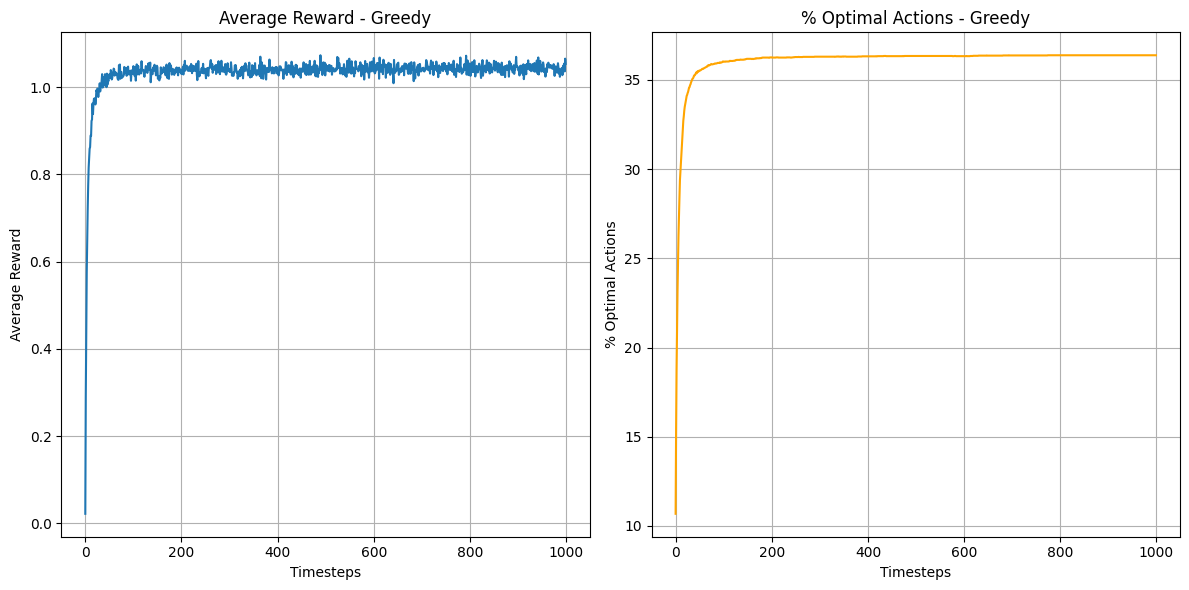

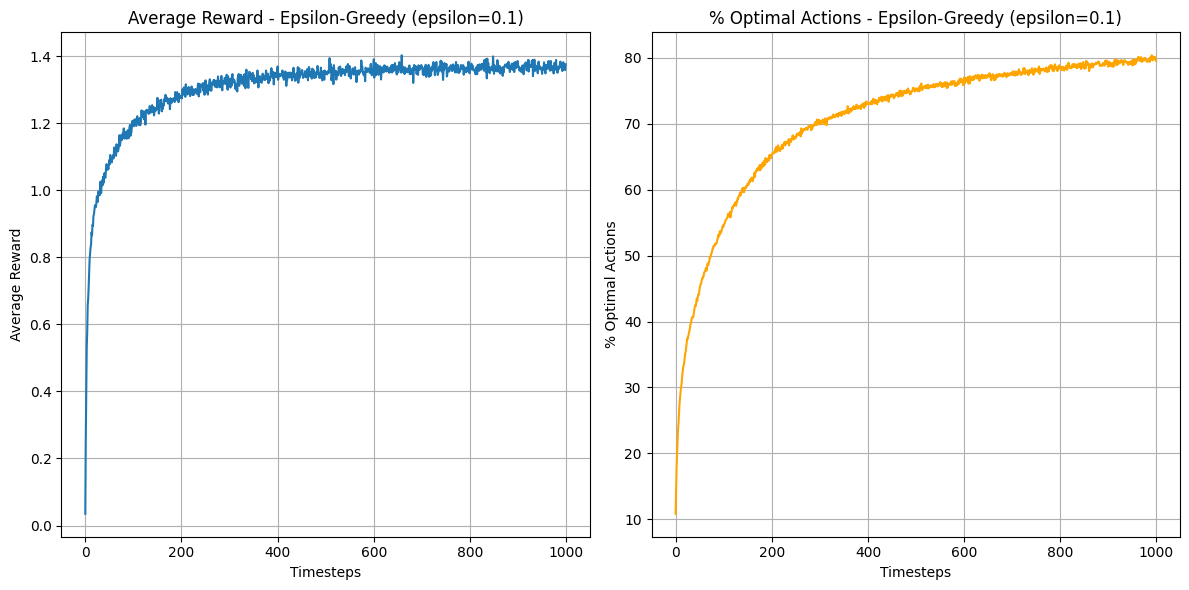

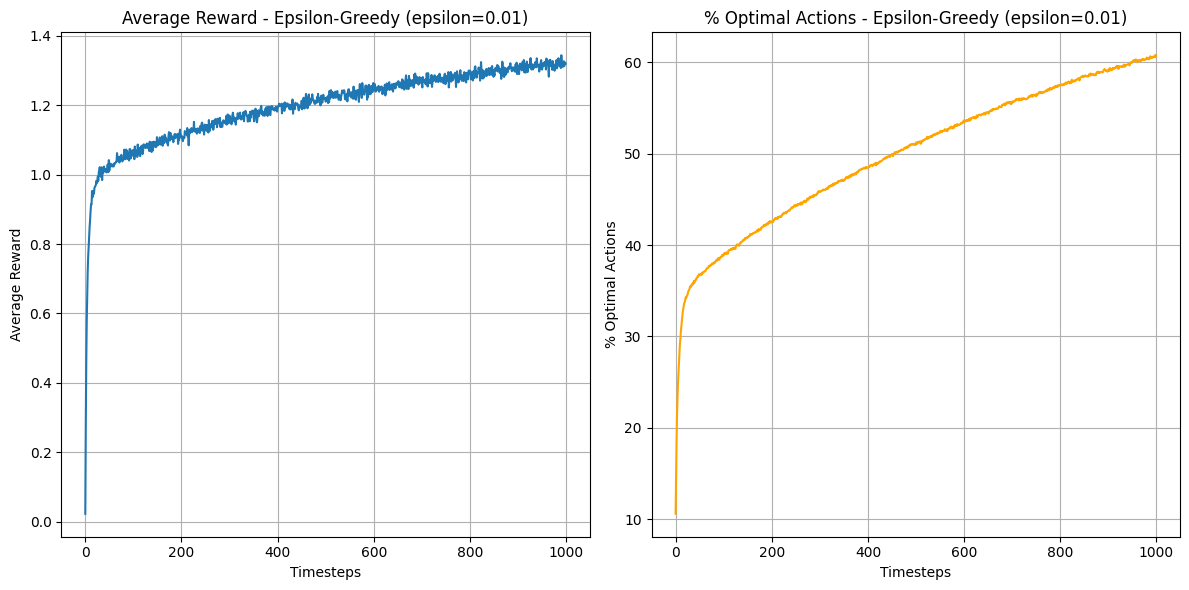

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


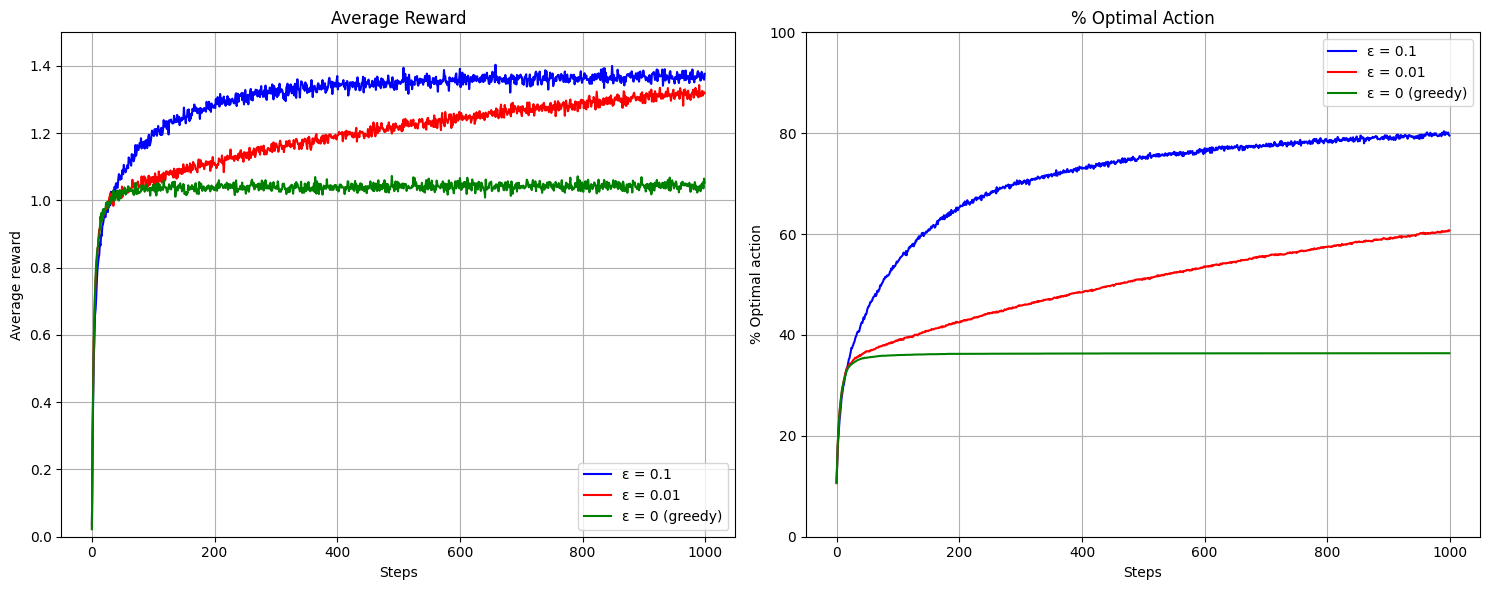

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


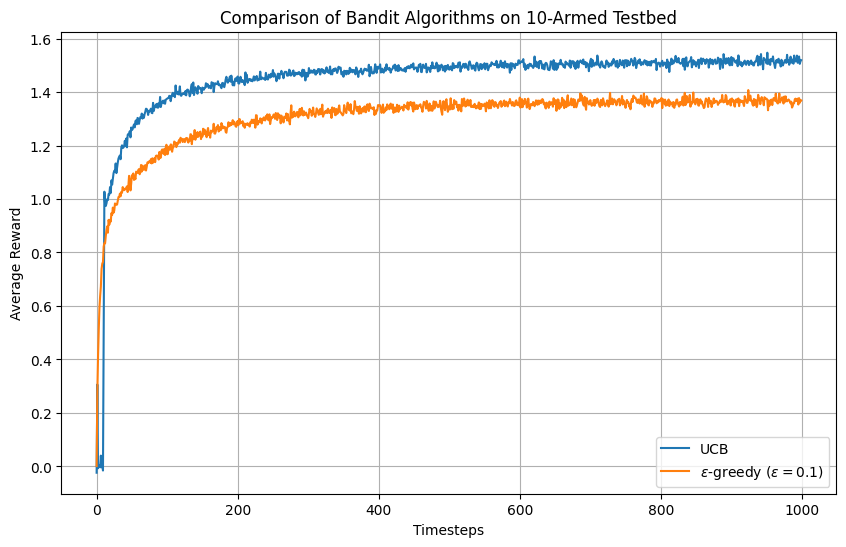

In [6]:
# write your code here for the bonus problem

# This is a function to generate a single bandit problem.
def generate_bandit_problem(num_arms=10):
    return np.random.normal(0, 1, num_arms)  # q*(a) values from Gaussian(0, 1)

# This is a function to implement the sample average method with incremental implementation
def sample_average_method(bandit_problems, num_timesteps=1000, epsilon=0):
    num_bandits = len(bandit_problems)
    num_arms = len(bandit_problems[0])

    rewards = np.zeros((num_bandits, num_timesteps))
    optimal_actions = np.zeros((num_bandits, num_timesteps))

    for b in range(num_bandits):
        q_star = bandit_problems[b]
        optimal_action = np.argmax(q_star)

        q_estimates = np.zeros(num_arms)  # Initial estimates of action values, we have initialized them to 0.
        action_counts = np.zeros(num_arms)  # We count the number of times each action is taken.

        for t in range(num_timesteps):
            if np.random.rand() < epsilon:
                action = np.random.choice(num_arms)  # Exploration Technique
            else:
                action = np.argmax(q_estimates)  # Exploitation Technique

            reward = np.random.normal(q_star[action], 1)  # Reward sampled from Gaussian(q(a), 1)
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]  # Update happens incrementally.

            rewards[b, t] = reward
            if action == optimal_action:
                optimal_actions[b, t] = 1

    return rewards, optimal_actions

# Simple function to plot the learning curves separately.
def plot_learning_curves(rewards, optimal_actions, num_timesteps, algorithm_name):
    average_rewards = np.mean(rewards, axis=0)
    average_optimal_actions = np.mean(optimal_actions, axis=0) * 100

    plt.figure(figsize=(12, 6))

    # Rewards Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(num_timesteps), average_rewards)
    plt.title(f'Average Reward - {algorithm_name}')
    plt.xlabel('Timesteps')
    plt.ylabel('Average Reward')
    plt.grid()

    # % Optimal actions plot
    plt.subplot(1, 2, 2)
    plt.plot(range(num_timesteps), average_optimal_actions, color='orange')
    plt.title(f'% Optimal Actions - {algorithm_name}')
    plt.xlabel('Timesteps')
    plt.ylabel('% Optimal Actions')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Set the parameters.
num_bandits = 10000
num_timesteps = 1000
num_arms = 10

bandit_problems = [generate_bandit_problem(num_arms=num_arms) for _ in range(num_bandits)]

# Greedy algorithm (epsilon=0)
rewards_greedy, optimal_actions_greedy = sample_average_method(bandit_problems, num_timesteps, epsilon=0)
plot_learning_curves(rewards_greedy, optimal_actions_greedy, num_timesteps, 'Greedy')

# Epsilon-greedy algorithm (epsilon=0.1)
rewards_epsilon_01, optimal_actions_epsilon_01 = sample_average_method(bandit_problems, num_timesteps, epsilon=0.1)
plot_learning_curves(rewards_epsilon_01, optimal_actions_epsilon_01, num_timesteps, 'Epsilon-Greedy (epsilon=0.1)')

# Epsilon-greedy algorithm (epsilon=0.01)
rewards_epsilon_001, optimal_actions_epsilon_001 = sample_average_method(bandit_problems, num_timesteps, epsilon=0.01)
plot_learning_curves(rewards_epsilon_001, optimal_actions_epsilon_001, num_timesteps, 'Epsilon-Greedy (epsilon=0.01)')

print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")

# Create combined plots
plt.figure(figsize=(15, 6))

# Average rewards plot
plt.subplot(1, 2, 1)
plt.plot(range(num_timesteps), np.mean(rewards_epsilon_01, axis=0), 'b-', label='ε = 0.1')
plt.plot(range(num_timesteps), np.mean(rewards_epsilon_001, axis=0), 'r-', label='ε = 0.01')
plt.plot(range(num_timesteps), np.mean(rewards_greedy, axis=0), 'g-', label='ε = 0 (greedy)')
plt.title('Average Reward')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.5)

# % Optimal actions plot
plt.subplot(1, 2, 2)
plt.plot(range(num_timesteps), np.mean(optimal_actions_epsilon_01, axis=0) * 100, 'b-', label='ε = 0.1')
plt.plot(range(num_timesteps), np.mean(optimal_actions_epsilon_001, axis=0) * 100, 'r-', label='ε = 0.01')
plt.plot(range(num_timesteps), np.mean(optimal_actions_greedy, axis=0) * 100, 'g-', label='ε = 0 (greedy)')
plt.title('% Optimal Action')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.grid(True)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")

# Parameters
n_bandits = 10000
n_timesteps = 1000
n_arms = 10
epsilon = 0.1

# Generate true rewards once for fair comparison
np.random.seed(42)
true_rewards = np.random.normal(0, 1, (n_bandits, n_arms))

ucb_rewards = run_bandit_algorithm(lambda: UCB(n_arms), n_bandits, n_timesteps, true_rewards)
epsilon_rewards = run_bandit_algorithm(lambda: EpsilonGreedy(n_arms, epsilon), n_bandits, n_timesteps, true_rewards)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ucb_rewards, label='UCB')
plt.plot(epsilon_rewards, label=r'$\epsilon$-greedy ($\epsilon=0.1$)')
plt.xlabel('Timesteps')
plt.ylabel('Average Reward')
plt.title('Comparison of Bandit Algorithms on 10-Armed Testbed')
plt.legend()
plt.grid(True)
plt.show()

### Observations from problem-3

1. First of all, there is no much difference for the both of the problems, than we saw them in their individual space.
2. The only difference and observation I could see, is that the graphs are more smoother, which shows that the initial observation we made are accurate in their domains.
3. I firmly believe, if we run the bandit and UCB algorithm a million times, we will have even more smoother curves. Thus, stabilizing our experimentation results.